In [58]:
import pandas as pd

In [59]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [60]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [61]:
# считаем все-все данные

In [62]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [63]:
train.shape

(15223, 52)

In [64]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [65]:
test.shape

(14910, 51)

In [66]:
# отделим таргет от TRAIN-а

In [67]:
y = train['TARGET']

In [68]:
train = train.drop('TARGET', axis=1)

In [69]:
# соеденим train и test

In [70]:
all_data = pd.concat([train, test])

In [71]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [72]:
# посмотрим типы данных и их заполняемость

In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [74]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [75]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Среднее специальное', 'Ученая степень', 'Два и более высших образования', 'Неполное среднее'}

MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке'}

GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Другие сферы', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Транспорт', 'Химия/Парфюмерия/Фармацевтика', 'Недвижимость', 'Салоны красоты и здоровья', 'Наука', 'Информационные технологии', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Энергетика', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Сборочные производства', 'Строительство', 'Маркетинг', 'Банк/Финансы', 'Сельское хозяйство', 'Туризм', 'Торговля', 'Логистика', 'Нефтегазовая промышленность'}

GEN_TITLE
{na

In [76]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [77]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [78]:
# причина же что использовалась запятая для разделения не целой части числа

In [79]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [80]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [81]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Среднее специальное', 'Ученая степень', 'Два и более высших образования', 'Неполное среднее'}

MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке'}

GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Другие сферы', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Транспорт', 'Химия/Парфюмерия/Фармацевтика', 'Недвижимость', 'Салоны красоты и здоровья', 'Наука', 'Информационные технологии', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Энергетика', 'Страхование', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Сборочные производства', 'Строительство', 'Маркетинг', 'Банк/Финансы', 'Сельское хозяйство', 'Туризм', 'Торговля', 'Логистика', 'Нефтегазовая промышленность'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [82]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [83]:
# Есть ли пропуски в данных? что с ними сделать?
all_data['WORK_TIME'][all_data['WORK_TIME'].isnull()]=all_data['WORK_TIME'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
# Как поступить со строковыми переменными?
all_data = pd.get_dummies(all_data, columns=['EDUCATION', 'MARITAL_STATUS','FAMILY_INCOME'])
all_data = all_data.drop(['PREVIOUS_CARD_NUM_UTILIZED', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE','ORG_TP_FCAPITAL',
                           'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE',
                          'REGION_NM','JOB_DIR'],axis = 1)

In [85]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 54 columns):
AGREEMENT_RK                                30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

In [ ]:
# В итоге должны получиться данные без пропусков и только числовые

In [100]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
X_tr = all_data.iloc[:15223,:]
X_tst = all_data.iloc[15223:,:]

In [103]:
print (X_tr.shape)
print (X_tst.shape)
print (y.shape)

(15223, 54)
(14910, 54)
(15223,)


In [102]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.3, random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
predict_tree = dtc.predict(X_test)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
predict_forest = rfc.predict(X_test)

rgr = LogisticRegression(random_state=42)
rgr.fit(X_train, y_train)
predict_regr = rgr.predict(X_test)

In [112]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import precision_score, recall_score,accuracy_score
print('Дерево решений:')
print('accuracy', accuracy_score(y_test, predict_tree))
print('precision', precision_score(y_test, predict_tree)) 
print('recall', recall_score(y_test, predict_tree))  
print('')
print('Лес решений:')
print('accuracy', accuracy_score(y_test, predict_forest))
print('precision', precision_score(y_test, predict_forest)) 
print('recall', recall_score(y_test, predict_forest))
print('')
print('Регрессия:')
print('accuracy', accuracy_score(y_test, predict_regr))
print('precision', precision_score(y_test, predict_regr)) 
print('recall', recall_score(y_test, predict_regr))

Дерево решений:
accuracy 0.790672213707
precision 0.148861646235
recall 0.153153153153

Лес решений:
accuracy 0.876286402452
precision 0.307692307692
recall 0.0144144144144

Регрессия:
accuracy 0.878476023648
precision 0.0
recall 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.        ,  0.01531532,  0.03063063,  0.04594595,  0.06126126,
         0.07657658,  0.09189189,  0.10720721,  0.12252252,  0.13783784,
         0.15315315]),
 <a list of 10 Patch objects>)

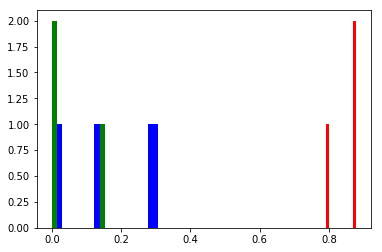

In [165]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist([accuracy_score(y_test, predict_tree),accuracy_score(y_test, predict_forest),accuracy_score(y_test, predict_regr)],color = 'red')
plt.hist([precision_score(y_test, predict_tree),precision_score(y_test,predict_forest),precision_score(y_test, predict_regr)],color = 'blue')
plt.hist([recall_score(y_test, predict_tree),recall_score(y_test, predict_forest),recall_score(y_test, predict_regr)],color = 'green')

Дерево: 0.516008281462
Лес: 0.504963937018
Регрессия: 0.5


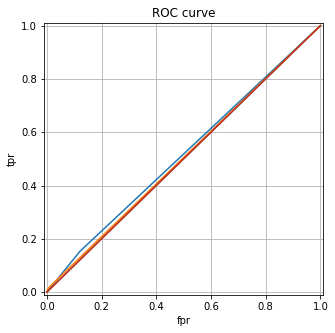

In [174]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели

from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_tree)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_forest)
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_regr)
plt.figure(figsize=(5, 5))   
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('Дерево:',roc_auc_score(y_test, predict_tree))
print('Лес:',roc_auc_score(y_test, predict_forest))
print('Регрессия:',roc_auc_score(y_test, predict_regr))
# Ваш код :-)

In [187]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
print('Дерево: ',cross_val_score(dtc, X_train, y_train,scoring='roc_auc',cv=10).mean())
print('Лес: ',cross_val_score(rfc, X_train, y_train,scoring='roc_auc',cv=10).mean())
print('Регрессия: ',cross_val_score(rgr, X_train, y_train,scoring='roc_auc',cv=10).mean())
# Ваш код :-)

Дерево:  0.5178020845
Лес:  0.584445138677
Регрессия:  0.53487590722


In [188]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
#Берем "Лес"
predict = rfc.predict_proba(X_tst)

In [189]:
predict

array([[ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 0.6,  0.4],
       ..., 
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 0.8,  0.2]])